In [1]:
import matplotlib.pyplot as plt
from jax.random import PRNGKey, split
import jax.numpy as jnp

from jax import config
config.update("jax_enable_x64", True)

from data import generate_data, generate_observation_matrix
from loss import create_loss
from network import init_net_orth, init_net_spec, compute_end_to_end, compute_factor, compress_network
from solver import train
from utils import compose, svd

In [2]:
key = PRNGKey(0)

# Simulated Data
r = 10
d = 100

key, subkey = split(key)
target = generate_data(key=subkey, shape=(d, d), rank=r)

key, subkey = split(key)
percent_observed = 0.30
mask = generate_observation_matrix(key=subkey, percent_observed=percent_observed, shape=(d, d))

train_loss_fn = create_loss(target, mask=mask)
test_loss_fn = create_loss(target, mask=1-mask)
train_e2e_loss_fn = compose(train_loss_fn, compute_end_to_end)
test_e2e_loss_fn = compose(test_loss_fn, compute_end_to_end)

tol = 1e-10
n_outer_loops = 600
n_trials = 5

input_dim = d
output_dim = d
init_scale = 1e-3

## 3-layer network

In [3]:
depth = 3
step_size = 3e2

widths = jnp.arange(10, 101, 10)
three_layer_test_loss_mean = []
three_layer_test_loss_std = []
three_layer_num_iters_mean = []
three_layer_num_iters_std = []

for width in widths:
    print(f'{width=}')
    
    test_losses = []
    num_iters = []
    
    for _ in range(n_trials):
        key, subkey = split(key)
        init_weights = init_net_orth(
            key=subkey, 
            input_dim=input_dim, 
            output_dim=output_dim, 
            width=width, 
            depth=depth, 
            init_scale=init_scale
        )

        result = train(
            init_weights=init_weights,
            train_e2e_loss_fn=train_e2e_loss_fn,
            n_outer_loops=n_outer_loops,
            step_size=step_size,
            test_e2e_loss_fn=test_e2e_loss_fn,
            tol=tol
        )
        
        test_losses.append(result['test_loss'][-1])
        num_iters.append(len(result['test_loss']))
        
    test_losses = jnp.array(test_losses)
    num_iters = jnp.array(num_iters)
        
    three_layer_test_loss_mean.append(jnp.mean(test_losses))
    three_layer_test_loss_std.append(jnp.std(test_losses))
    three_layer_num_iters_mean.append(jnp.mean(num_iters))
    three_layer_num_iters_std.append(jnp.std(num_iters))
    
    

width=Array(10, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(20, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(30, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(40, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(50, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(60, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(70, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(80, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(90, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(100, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

## 2-layer network

In [5]:
depth = 2
step_size = 3e2

widths = jnp.arange(10, 101, 10)
two_layer_test_loss_mean = []
two_layer_test_loss_std = []
two_layer_num_iters_mean = []
two_layer_num_iters_std = []

for width in widths:
    print(f'{width=}')
    key, subkey = split(key)
    
    test_losses = []
    num_iters = []
    
    for _ in range(n_trials):
        key, subkey = split(key)
        init_weights = init_net_orth(
            key=subkey, 
            input_dim=input_dim, 
            output_dim=output_dim, 
            width=width, 
            depth=depth, 
            init_scale=init_scale
        )

        step_size = 1e2
        result = train(
            init_weights=init_weights,
            train_e2e_loss_fn=train_e2e_loss_fn,
            n_outer_loops=n_outer_loops,
            step_size=step_size,
            test_e2e_loss_fn=test_e2e_loss_fn,
            tol=tol
        )
        
        test_losses.append(result['test_loss'][-1])
        num_iters.append(len(result['test_loss']))
        
    test_losses = jnp.array(test_losses)
    num_iters = jnp.array(num_iters)
        
    two_layer_test_loss_mean.append(jnp.mean(test_losses))
    two_layer_test_loss_std.append(jnp.std(test_losses))
    two_layer_num_iters_mean.append(jnp.mean(num_iters))
    two_layer_num_iters_mean.append(jnp.std(num_iters))

width=Array(10, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(20, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(30, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(40, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(50, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(60, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(70, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(80, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(90, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

width=Array(100, dtype=int64)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

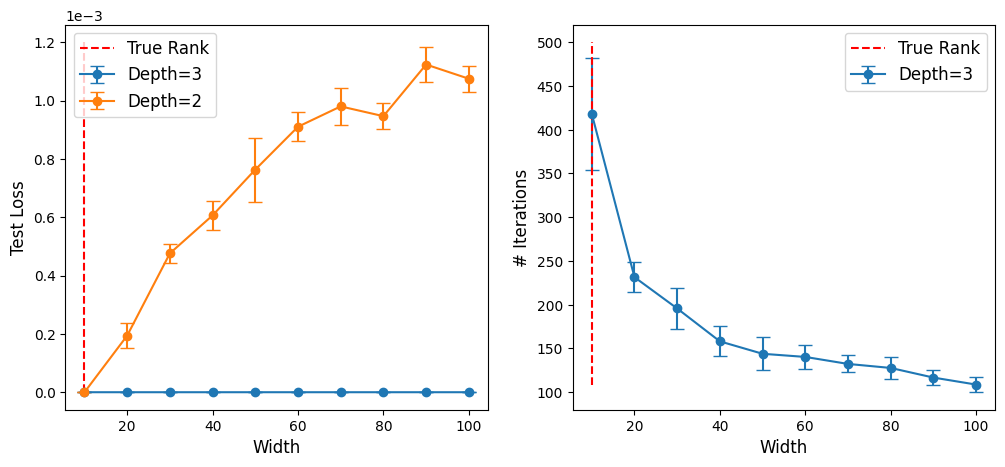

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
axes[0].errorbar(widths, three_layer_test_loss_mean, yerr=three_layer_test_loss_std, fmt='-o', capsize=5, label='Depth=3')
axes[0].errorbar(widths, two_layer_test_loss_mean, yerr=two_layer_test_loss_std, fmt='-o', capsize=5, label='Depth=2')
axes[0].set_xlabel('Width', fontsize=12)
axes[0].set_ylabel('Test Loss', fontsize=12)
axes[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axes[0].vlines(x=10, ymin=0, ymax=1.2e-3, colors='r', linestyles='--', label='True Rank')
axes[0].legend(fontsize=12)

axes[1].errorbar(widths, three_layer_num_iters_mean, yerr=three_layer_num_iters_std, fmt='-o', capsize=5, label='Depth=3')
axes[1].set_xlabel('Width', fontsize=12)
axes[1].set_ylabel('# Iterations', fontsize=12)
axes[1].vlines(x=10, ymin=min(three_layer_num_iters_mean), ymax=500, colors='r', linestyles='--', label='True Rank')
axes[1].legend(fontsize=12)

plt.savefig('figs/depth_2_v_3.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.errorbar(widths, two_layer_test_loss_mean, 'o', label='depth=2')
plt.semilogy(widths, three_layer_test_loss_mean, 'o', label='depth=3')
plt.legend()

In [ ]:
plt.semilogy(widths, two_layer_test_loss_mean, 'o', label='depth=2')